In [1]:
import pandas as pd
import numpy as np
import datetime
import scipy.stats
from ggplot import *
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
from pprint import pprint

In [2]:
data = pd.read_csv("C:\\Users\\Vijay Sahni\\Documents\\Data Science Projects\\Udacity\P2 - Investigate a Dataset NYC Turnstile Data\\turnstile_weather_v2.csv")

In [3]:
data

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,05-01-11,00:00:00,4388333,2911002,0,0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0.000000,30.258000,55.980000,7.860000,40.700348,-73.887177
1,R003,05-01-11,04:00:00,4388333,2911002,0,0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0.000000,30.258000,55.980000,7.860000,40.700348,-73.887177
2,R003,05-01-11,12:00:00,4388333,2911002,0,0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0.000000,30.258000,55.980000,7.860000,40.700348,-73.887177
3,R003,05-01-11,16:00:00,4388333,2911002,0,0,2011-05-01 16:00:00,16,6,...,30.26,0,57.9,15.0,0.000000,30.258000,55.980000,7.860000,40.700348,-73.887177
4,R003,05-01-11,20:00:00,4388333,2911002,0,0,2011-05-01 20:00:00,20,6,...,30.28,0,52.0,10.4,0.000000,30.258000,55.980000,7.860000,40.700348,-73.887177
5,R003,05-02-11,00:00:00,4388348,2911036,15,34,2011-05-02 00:00:00,0,0,...,30.31,0,50.0,6.9,0.000000,30.238333,54.166667,8.250000,40.700348,-73.887177
6,R003,05-02-11,04:00:00,5818689,3874767,19,40,2011-05-02 04:00:00,4,0,...,30.27,0,50.0,4.6,0.000000,30.238333,54.166667,8.250000,40.700348,-73.887177
7,R003,05-02-11,08:00:00,4388855,2911194,488,118,2011-05-02 08:00:00,8,0,...,30.30,0,53.1,10.4,0.000000,30.238333,54.166667,8.250000,40.700348,-73.887177
8,R003,05-02-11,12:00:00,4389345,2911326,490,132,2011-05-02 12:00:00,12,0,...,30.24,0,57.0,11.5,0.000000,30.238333,54.166667,8.250000,40.700348,-73.887177
9,R003,05-02-11,16:00:00,4389576,2911558,231,232,2011-05-02 16:00:00,16,0,...,30.16,0,59.0,11.5,0.000000,30.238333,54.166667,8.250000,40.700348,-73.887177


In [4]:
data.DATEn = data.DATEn.apply(lambda d: datetime.datetime.strptime(d, "%m-%d-%y").strftime("%Y-%m-%d"))

In [5]:
data.columns

Index([u'UNIT', u'DATEn', u'TIMEn', u'ENTRIESn', u'EXITSn', u'ENTRIESn_hourly',
       u'EXITSn_hourly', u'datetime', u'hour', u'day_week', u'weekday',
       u'station', u'latitude', u'longitude', u'conds', u'fog', u'precipi',
       u'pressurei', u'rain', u'tempi', u'wspdi', u'meanprecipi',
       u'meanpressurei', u'meantempi', u'meanwspdi', u'weather_lat',
       u'weather_lon'],
      dtype='object')

In [7]:
rainy_days = (data.rain == 1) # Returns a true false list of the data

In [8]:
no_rain = (data.rain == 0)

In [9]:
rainy_day_stats = [data[rainy_days].ENTRIESn_hourly.mean(), data[rainy_days].ENTRIESn_hourly.std()]
rainy_day_stats

[2028.1960354720918, 3189.4333728816387]

In [10]:
no_rain_stats = [data[no_rain].ENTRIESn_hourly.mean(), data[no_rain].ENTRIESn_hourly.std()]
no_rain_stats

[1845.5394386644084, 2878.7708479755574]

In [11]:
all_data_stats = [data.ENTRIESn_hourly.mean(), data.ENTRIESn_hourly.std()]
all_data_stats

[1886.5899552158317, 2952.385584813844]

In [12]:
def linear_regression(features, values):
    features = sm.add_constant(features)
    model = sm.OLS(values, features)
    results = model.fit()
    print results.summary()
    intercept = results.params[0]
    params = results.params[1:]
    return intercept, params

def predictions(dataframe):
    features = dataframe[['hour', 'meantempi', 'rain']]
    dummy_units = pd.get_dummies(dataframe[['UNIT', 'weekday']], prefix = 'unit')
    features = features.join(dummy_units)
    values = dataframe['ENTRIESn_hourly']
    intercept, params = linear_regression(features, values)
    predictions = intercept + np.dot(features, params)
    return predictions



In [64]:
my_array = predictions(data)
my_array

                            OLS Regression Results                            
Dep. Variable:        ENTRIESn_hourly   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     162.6
Date:                Fri, 22 Apr 2016   Prob (F-statistic):               0.00
Time:                        21:54:18   Log-Likelihood:            -3.8726e+05
No. Observations:               42649   AIC:                         7.750e+05
Df Residuals:                   42405   BIC:                         7.771e+05
Df Model:                         243                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        779.0872    103.431      7.532      0.0

array([-1636.69247606, -1143.07722965,  -155.84673683, ...,   322.3900654 ,
         816.00531181,  1309.62055822])

In [13]:
rainy_day_limited = data[rainy_days]
rainy_day_limited = rainy_day_limited[rainy_day_limited.ENTRIESn_hourly <= 10000]
rainy_day_limited

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
16,R003,2011-05-04,00:00:00,4391507,2913223,83,174,2011-05-04 00:00:00,0,2,...,29.94,1,59.0,9.2,0.010000,29.953333,53.933333,11.700000,40.700348,-73.887177
17,R003,2011-05-04,04:00:00,4391531,2913258,24,35,2011-05-04 04:00:00,4,2,...,29.91,1,60.1,0.0,0.010000,29.953333,53.933333,11.700000,40.700348,-73.887177
18,R003,2011-05-04,08:00:00,4392063,2913388,532,130,2011-05-04 08:00:00,8,2,...,29.94,1,55.4,15.0,0.010000,29.953333,53.933333,11.700000,40.700348,-73.887177
19,R003,2011-05-04,12:00:00,4392517,2913495,454,107,2011-05-04 12:00:00,12,2,...,29.96,1,51.1,11.5,0.010000,29.953333,53.933333,11.700000,40.700348,-73.887177
20,R003,2011-05-04,16:00:00,4392764,2913744,247,249,2011-05-04 16:00:00,16,2,...,29.96,1,48.0,18.4,0.010000,29.953333,53.933333,11.700000,40.700348,-73.887177
21,R003,2011-05-04,20:00:00,4392984,2914100,220,356,2011-05-04 20:00:00,20,2,...,30.01,1,50.0,16.1,0.010000,29.953333,53.933333,11.700000,40.700348,-73.887177
72,R003,2011-05-14,00:00:00,4404112,2921794,103,188,2011-05-14 00:00:00,0,5,...,29.87,1,57.0,8.1,0.000000,29.828000,59.540000,11.080000,40.700348,-73.887177
73,R003,2011-05-14,04:00:00,4404132,2921853,20,59,2011-05-14 04:00:00,4,5,...,29.85,1,57.0,8.1,0.000000,29.828000,59.540000,11.080000,40.700348,-73.887177
74,R003,2011-05-14,12:00:00,4404440,2921952,308,99,2011-05-14 12:00:00,12,5,...,29.84,1,62.6,17.3,0.000000,29.828000,59.540000,11.080000,40.700348,-73.887177
75,R003,2011-05-14,16:00:00,4404651,2922087,211,135,2011-05-14 16:00:00,16,5,...,29.80,1,61.0,12.7,0.000000,29.828000,59.540000,11.080000,40.700348,-73.887177


In [14]:
not_rainy_limited = data[no_rain]
not_rainy_limited = not_rainy_limited[not_rainy_limited.ENTRIESn_hourly <= 10000]
not_rainy_limited

,UNIT,DATEn,TIMEn,ENTRIESn,EXITSn,ENTRIESn_hourly,EXITSn_hourly,datetime,hour,day_week,...,pressurei,rain,tempi,wspdi,meanprecipi,meanpressurei,meantempi,meanwspdi,weather_lat,weather_lon
0,R003,2011-05-01,00:00:00,4388333,2911002,0,0,2011-05-01 00:00:00,0,6,...,30.22,0,55.9,3.5,0,30.258000,55.980000,7.860000,40.700348,-73.887177
1,R003,2011-05-01,04:00:00,4388333,2911002,0,0,2011-05-01 04:00:00,4,6,...,30.25,0,52.0,3.5,0,30.258000,55.980000,7.860000,40.700348,-73.887177
2,R003,2011-05-01,12:00:00,4388333,2911002,0,0,2011-05-01 12:00:00,12,6,...,30.28,0,62.1,6.9,0,30.258000,55.980000,7.860000,40.700348,-73.887177
3,R003,2011-05-01,16:00:00,4388333,2911002,0,0,2011-05-01 16:00:00,16,6,...,30.26,0,57.9,15.0,0,30.258000,55.980000,7.860000,40.700348,-73.887177
4,R003,2011-05-01,20:00:00,4388333,2911002,0,0,2011-05-01 20:00:00,20,6,...,30.28,0,52.0,10.4,0,30.258000,55.980000,7.860000,40.700348,-73.887177
5,R003,2011-05-02,00:00:00,4388348,2911036,15,34,2011-05-02 00:00:00,0,0,...,30.31,0,50.0,6.9,0,30.238333,54.166667,8.250000,40.700348,-73.887177
6,R003,2011-05-02,04:00:00,5818689,3874767,19,40,2011-05-02 04:00:00,4,0,...,30.27,0,50.0,4.6,0,30.238333,54.166667,8.250000,40.700348,-73.887177
7,R003,2011-05-02,08:00:00,4388855,2911194,488,118,2011-05-02 08:00:00,8,0,...,30.30,0,53.1,10.4,0,30.238333,54.166667,8.250000,40.700348,-73.887177
8,R003,2011-05-02,12:00:00,4389345,2911326,490,132,2011-05-02 12:00:00,12,0,...,30.24,0,57.0,11.5,0,30.238333,54.166667,8.250000,40.700348,-73.887177
9,R003,2011-05-02,16:00:00,4389576,2911558,231,232,2011-05-02 16:00:00,16,0,...,30.16,0,59.0,11.5,0,30.238333,54.166667,8.250000,40.700348,-73.887177


C:\Anaconda2\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


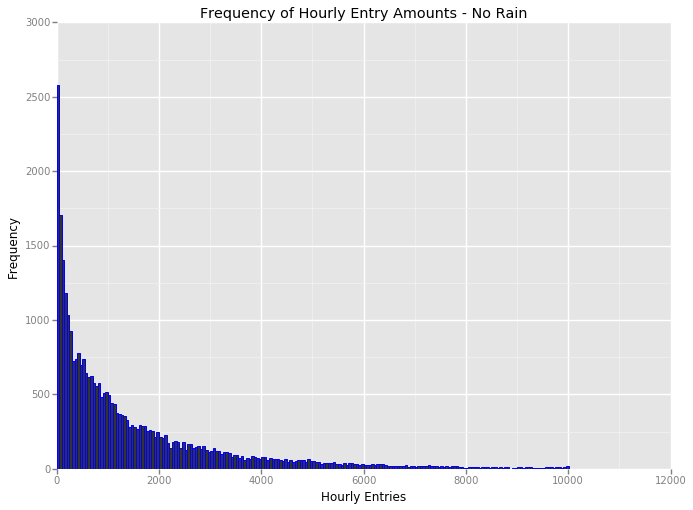

<ggplot: (18622443)>

In [15]:
ggplot(aes(x = 'ENTRIESn_hourly'), not_rainy_limited) + \
    geom_histogram(binwidth = 50, color = 'blue') + \
    ggtitle('Frequency of Hourly Entry Amounts - No Rain') + xlab('Hourly Entries') + ylab('Frequency')

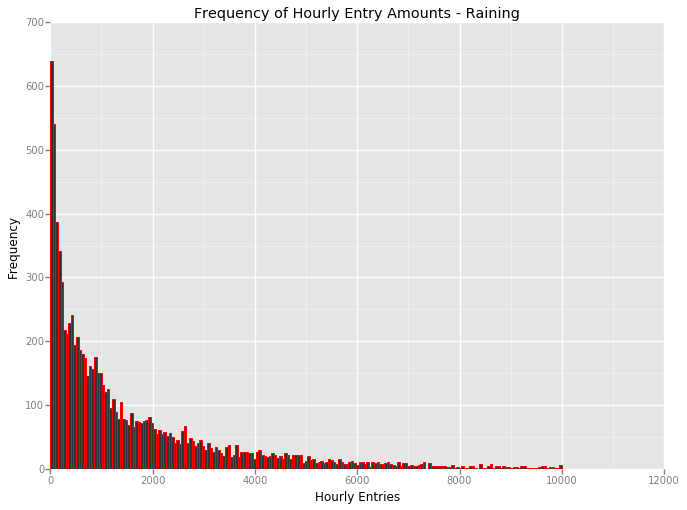

<ggplot: (18622425)>

In [16]:
ggplot(aes(x = 'ENTRIESn_hourly'), rainy_day_limited) + \
    geom_histogram(binwidth = 50, color = 'red') + \
    ggtitle('Frequency of Hourly Entry Amounts - Raining') + xlab('Hourly Entries') + ylab('Frequency')

In [17]:
'''
Compute the average of hourly entries, grouped by the day of the week
'''

days = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'] # iterate through multiple lists at once
indices = [0,1,2,3,4,5,6] 

avg_hourly_entries = {}

for r, s in zip(indices, days):
    avg_hourly_entries[s] = np.mean(data['ENTRIESn_hourly'].loc[data.day_week == r])

pprint(avg_hourly_entries)

{'Fri': 2277.3722935779815,
 'Mon': 1825.2649072753209,
 'Sat': 1383.9014787430683,
 'Sun': 1066.4361057763333,
 'Thurs': 2317.072379216044,
 'Tues': 2164.836433338066,
 'Wed': 2297.097956950018}


In [18]:
values = []
for r in days:
    values.append(avg_hourly_entries[r])
print values

[1825.2649072753209, 2164.836433338066, 2297.097956950018, 2317.072379216044, 2277.3722935779815, 1383.9014787430683, 1066.4361057763333]


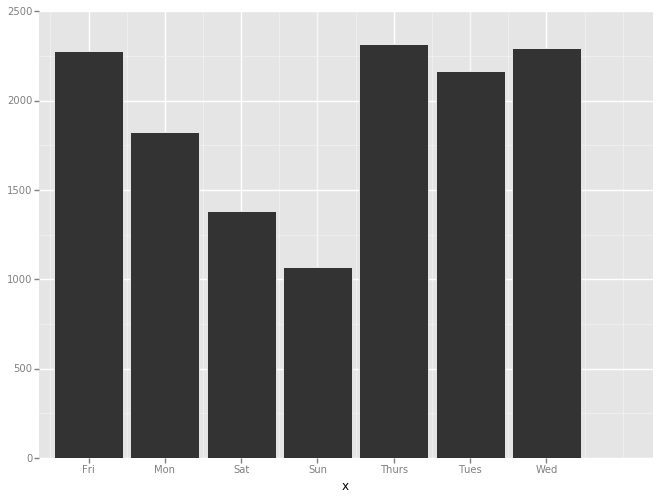

<ggplot: (18622835)>

In [19]:
'''
Now need to use all the values, and place them in a bar graph
'''

df = pd.DataFrame({'x': days, 'y': values})
ggplot(aes(x='x'), df) + geom_bar(aes(weight = 'y'))

In [ ]:
'''

Having trouble  ordering the days of the week. Consequently, going to import
the average hourly entries values into Excel, and make the bar graph in 
there

'''

In [24]:
'''

Need to proceed to conduct the actual Mann-Whitney U test. This is done by importing the scipy.stats module, which
contains a function to run the Mann-Whitney U Test. 

Previoulsy in the notebook, the dataset was separated into two parts based on whether it rained or not, and was stored
in the variables rainy_day_limited and not_rainy_limited. The values are limited to entries with hourly entries less 
than 10,000, since this is where most of the data lies. Upon plotting, it was seen that anything above this
was an outlier. The large volume of entires could have been a result of a mega-event, such as a sporting event. 
Consequently, this is not taken into the analysis.

The data for hourly entries for both sets of data is extracted, and then the Mann-Whitney U-Test is run.

'''

no_rain_entries_hourly = not_rainy_limited.ENTRIESn_hourly

rain_entries_hourly = rainy_day_limited.ENTRIESn_hourly

U, p = scipy.stats.mannwhitneyu(no_rain_entries_hourly, rain_entries_hourly)

print "U-value is: %d" %U
print p


'''

As can be seen above, no p-value is returned. Upon researching the problem, I discovered that the issue was discussed in 
the following thread on Udacity:
https://discussions.udacity.com/t/mann-whitney-u-test-on-improved-dataset-yields-p-nan/4470 
Based on the suggestion by an Udacity coach, the p value from the Udacity IDE was used in the analysis, which was
calculated to be approximately 0.024999912. Because we are interested in conducting a two tailed test, the p-value must 
be multiplied by two, resulting in the p value being 0.049999824.

'''

U-value is: 145567830
nan
